In [2]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np


In [3]:
# Load the pretrained VGG16 model
model = VGG16(weights='imagenet')


In [4]:
# Load an example image (you can replace this with your own image)
image_path = 'path/to/your/image.jpg'
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = preprocess_input(image_array)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/image.jpg'

In [ ]:
# Make predictions
predictions = model.predict(image_array)
decoded_predictions = decode_predictions(predictions, top=1)[0]

# Get the top predicted class and its probability
predicted_class, class_description, confidence = decoded_predictions[0]

# Define a threshold for confidence (you can adjust this)
confidence_threshold = 0.5

# Check if the predicted class corresponds to a crack
if 'crack' in class_description.lower() and confidence >= confidence_threshold:
    print(f"The image contains a crack (Class: {predicted_class}, Confidence: {confidence:.2f})")
else:
    print(f"The image does not contain a crack (Class: {predicted_class}, Confidence: {confidence:.2f})")

In [14]:
import tensorflow as tf
import numpy as np
import pathlib as pl
from colorama import Fore, Style

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [6]:
vgg = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
# Use 'sigmoid' activation for binary classification
x = Dense(1, activation='sigmoid')(x)

In [9]:

model = Model(inputs=vgg.input, outputs=x)
#print(model.summary())

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
import CNN
train_dir = CNN.datasets["Mendelay_1"]
test_dir = CNN.datasets["Mendelay_1"]
test_private = CNN.datasets["Mendelay_FULL"]
print(train_dir)
print(test_private)

Data source: C:\Users\amani\OneDrive\Documents\GitHub\DT586_Project\Code_Images
C:\Users\amani\OneDrive\Documents\GitHub\DT586_Project\Code_Images\Mendelay_1\64
C:\Users\amani\OneDrive\Documents\GitHub\DT586_Project\Code_Images\Mendelay_FULL


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='binary',) # Change class_mode to 'binary'

validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode='binary',) # Change class_mode to 'binary'

Found 200 images belonging to 2 classes.


Found 200 images belonging to 2 classes.


In [13]:
predict = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

Epoch 1/5
7/7 [==============================] - 31s 4s/step - loss: 2.2213 - accuracy: 0.4750 - val_loss: 0.5427 - val_accuracy: 0.9500
Epoch 2/5
7/7 [==============================] - 26s 4s/step - loss: 0.5788 - accuracy: 0.7050 - val_loss: 0.3941 - val_accuracy: 0.9550
Epoch 3/5
7/7 [==============================] - 26s 4s/step - loss: 0.3916 - accuracy: 0.8050 - val_loss: 0.2796 - val_accuracy: 0.9700
Epoch 4/5
7/7 [==============================] - 25s 4s/step - loss: 0.2692 - accuracy: 0.8900 - val_loss: 0.1903 - val_accuracy: 0.9750
Epoch 5/5
7/7 [==============================] - 25s 4s/step - loss: 0.2276 - accuracy: 0.9450 - val_loss: 0.1466 - val_accuracy: 0.9800


In [ ]:
# prediction.shape

In [25]:
import pathlib as pl
for file in pl.Path(test_dir,"Negative").iterdir():
    img = tf.keras.preprocessing.image.load_img(file, target_size=(224,224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)

    predictions.shape
    print(predictions)
    prediction = predictions[0][0]

    # Use 0.5 threshold for binary classification
    if prediction > 0.5:
        print(Fore.GREEN + f"{file.name} is a crack {prediction}")
    else:
        print(Fore.RED + f"{file.name} is not a crack {prediction}")

1/1 [==============================] - 0s 115ms/step
[[0.99862075]]
00001.jpg is a crack 0.9986207485198975
1/1 [==============================] - 0s 107ms/step
[[1.]]
00002.jpg is a crack 1.0
1/1 [==============================] - 0s 100ms/step
[[0.00150528]]
00003.jpg is not a crack 0.0015052782837301493
1/1 [==============================] - 0s 96ms/step
[[0.9991604]]
00004.jpg is a crack 0.9991604089736938
1/1 [==============================] - 0s 97ms/step
[[0.9999313]]
00005.jpg is a crack 0.999931275844574
1/1 [==============================] - 0s 102ms/step
[[0.9765759]]
00006.jpg is a crack 0.9765759110450745
1/1 [==============================] - 0s 105ms/step
[[1.]]
00007.jpg is a crack 1.0
1/1 [==============================] - 0s 112ms/step
[[0.99782175]]
00008.jpg is a crack 0.9978217482566833
1/1 [==============================] - 0s 106ms/step
[[0.9999963]]
00009.jpg is a crack 0.9999963045120239
1/1 [==============================] - 0s 104ms/step
[[1.]]
00010.jpg is a

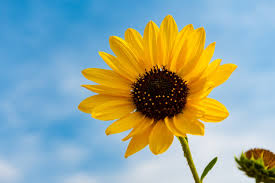

In [ ]:
from PIL import Image
image = Image.open('sunflower.jpg')
image


In [ ]:
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(275, 183)
RGB


In [ ]:
# asarray() class is used to convert
# PIL images into NumPy arrays
from numpy import asarray
numpydata = asarray(img)
numpydata.shape

(224, 224, 3)

In [ ]:
np_img = np.array(img)
np_img.shape

(224, 224, 3)